# Missing Data Analysis

### Packages importations

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Data first discovery

In [2]:
data = pd.read_csv('all_data.csv',low_memory =False)

#### Date & Time processing

In [3]:
data['year'],data['month'],data['day'] = data["date"].str.split("-").str
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)
data['hour'],data['minute'],data['second'] = data["time"].str.split(":").str
data['hour'] = data['hour'].astype(int)
data['minute'] = data['minute'].astype(int)
data['second'] = data['second'].astype(int)
data['date'] = pd.to_datetime(data['date'], format = "%Y-%m-%d")
data['time'] = pd.to_datetime(data['time'], format = "%H:%M:%S")
data['time'] = data["time"].dt.time

In [4]:
data['date'].dt.strftime('%Y-%m-%d').iloc[0]

'2013-01-01'

In [5]:
data['date'].iloc[0]

Timestamp('2013-01-01 00:00:00')

In [94]:
data['datetime'] = data['date'].dt.strftime('%Y-%m-%d') + ' ' + data['time'].map(str)
data['datetime'] = pd.to_datetime(data['datetime'], format = "%Y-%m-%d %H:%M:%S")

#### Missing data state

In [7]:
for col in data.columns:
    print("missing data in {} : {} i.e. {}%".format(col,len(data[data[col].isnull()]),
                                                       len(data[data[col].isnull()])/float(len(data)*100)))

missing data in co2 : 34095 i.e. 0.0008681492722772781%
missing data in humi : 17018 i.e. 0.0004333234877728324%
missing data in no : 98614 i.e. 0.0025109744049377184%
missing data in no2 : 46623 i.e. 0.0011871454325086829%
missing data in pm10 : 32425 i.e. 0.000825626635975678%
missing data in pm2.5 : 304035 i.e. 0.007741538759255676%
missing data in station : 0 i.e. 0.0%
missing data in temp : 17114 i.e. 0.00043576790279376264%
missing data in date : 0 i.e. 0.0%
missing data in time : 0 i.e. 0.0%
missing data in precipitation : 538 i.e. 1.369890917979691e-05%
missing data in temp_min : 538 i.e. 1.369890917979691e-05%
missing data in temp_max : 538 i.e. 1.369890917979691e-05%
missing data in ligne : 0 i.e. 0.0%
missing data in stop_id : 0 i.e. 0.0%
missing data in year : 0 i.e. 0.0%
missing data in month : 0 i.e. 0.0%
missing data in day : 0 i.e. 0.0%
missing data in hour : 0 i.e. 0.0%
missing data in minute : 0 i.e. 0.0%
missing data in second : 0 i.e. 0.0%
missing data in datetime :

Les colonnes possédant le plus de valeurs manquantes : no, pm10, pm2.5,co2  
WARNING no missing data in timetable, stations ect... because I(romain) generated the data

In [8]:
print(len(data[data["co2"].isnull() & 
                        data["humi"].isnull() &
                        data["no"].isnull() & 
                        data["no2"].isnull() &
                        data["pm10"].isnull() & 
                        data["pm2.5"].isnull() & 
                        data["no2"].isnull() & 
                       data["temp"].isnull()]))

15860


In [9]:
data.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,temp_max,ligne,stop_id,year,month,day,hour,minute,second,datetime
0,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,9.0,3,389,2013,1,1,10,0,0,2013-01-01 10:00:00
1,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,9.0,9,402,2013,1,1,10,0,0,2013-01-01 10:00:00
2,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,9.0,a,95,2013,1,1,10,0,0,2013-01-01 10:00:00
3,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,1.0,3,389,2013,1,15,10,0,0,2013-01-15 10:00:00
4,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,1.0,9,402,2013,1,15,10,0,0,2013-01-15 10:00:00


For 15860 raws, data is missing for almost all sensors (except rain) -> remove all these rows

### Missing data arrays

In [10]:
missing_data = data[data["co2"].isnull() | 
                        data["humi"].isnull() |
                        data["no"].isnull() | 
                        data["no2"].isnull() |
                        data["pm10"].isnull() | 
                        data["pm2.5"].isnull() |
                       data["temp"].isnull()]
missing_data.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,temp_max,ligne,stop_id,year,month,day,hour,minute,second,datetime
0,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,9.0,3,389,2013,1,1,10,0,0,2013-01-01 10:00:00
1,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,9.0,9,402,2013,1,1,10,0,0,2013-01-01 10:00:00
2,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,9.0,a,95,2013,1,1,10,0,0,2013-01-01 10:00:00
15,NaN,44.2,235.0,48.0,654.0,254.0,auber,17.8,2013-01-17,10:00:00,...,0.0,3,389,2013,1,17,10,0,0,2013-01-17 10:00:00
16,NaN,44.2,235.0,48.0,654.0,254.0,auber,17.8,2013-01-17,10:00:00,...,0.0,9,402,2013,1,17,10,0,0,2013-01-17 10:00:00


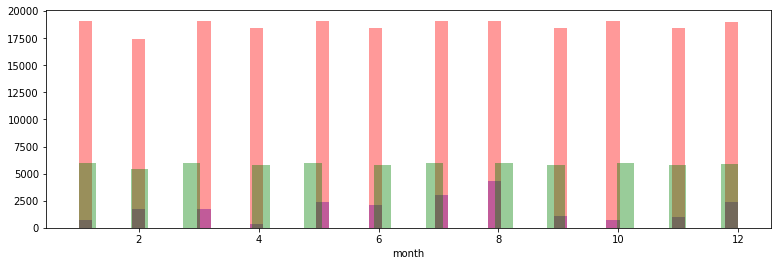

In [11]:
fig, ax = plt.subplots(figsize=(13,4))
sns.distplot(missing_data[missing_data['station'] == 'auber']['month'], ax = ax, kde = False, color='blue')
sns.distplot(missing_data[missing_data['station'] == 'chatelet']['month'], ax = ax, kde = False, color='red')
sns.distplot(missing_data[missing_data['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')



Discrepancies in missing data between the stations. Seems like Chatelet station is lacking a lot of data. 

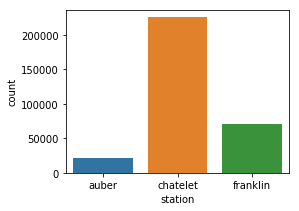

In [116]:
fig, ax = plt.subplots(figsize=(4,3))
ax = sns.countplot(ax=ax,data = missing_data,x="station")

In [13]:
data_2013 = data[data['date'] < "2013-12-31"]

In [14]:
missing_data_2013 = missing_data[missing_data['date'] < "2014-01-01"]
missing_data_2014 = missing_data[missing_data['date'] < "2015-01-01"]
missing_data_2014 = missing_data_2014[missing_data_2014['date'] > "2013-12-31"]
missing_data_2015 = missing_data[missing_data['date'] < "2016-01-01"]
missing_data_2015 = missing_data_2015[missing_data_2015['date'] > "2014-12-31"]
missing_data_2016 = missing_data[missing_data['date'] < "2017-01-01"]
missing_data_2016 = missing_data_2016[missing_data_2016['date'] > "2015-12-31"]
missing_data_2017 = missing_data[missing_data['date'] < "2018-01-01"]
missing_data_2017 = missing_data_2017[missing_data_2017['date'] > "2016-12-31"]

Text(0.5,1,'2016')

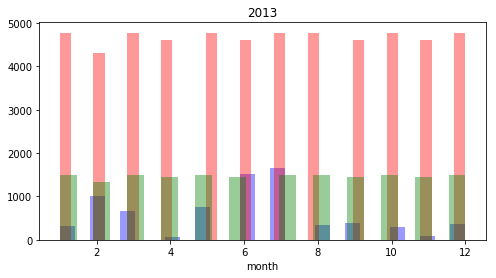

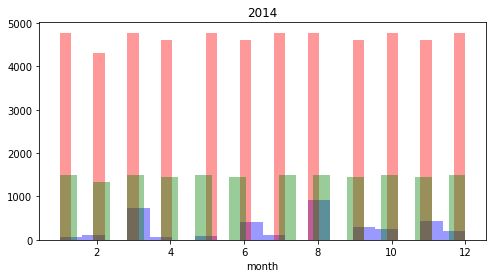

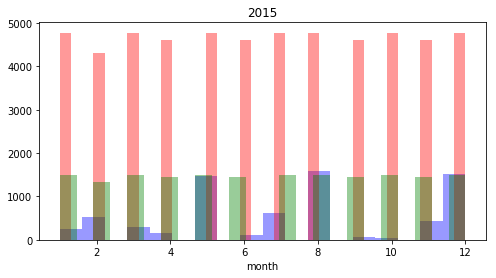

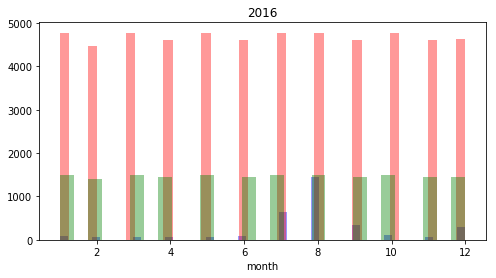

In [15]:

#2013
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(missing_data_2013[missing_data_2013['station'] == 'auber']['month'], ax = ax, kde = False, color='blue', label = 'Auber')
sns.distplot(missing_data_2013[missing_data_2013['station'] == 'chatelet']['month'], ax = ax, kde = False, color='red')
sns.distplot(missing_data_2013[missing_data_2013['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')
plt.title('2013')

#2014
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(missing_data_2014[missing_data_2014['station'] == 'auber']['month'], ax = ax, kde = False, color='blue', label = 'Auber')
sns.distplot(missing_data_2014[missing_data_2014['station'] == 'chatelet']['month'], ax = ax, kde = False, color='red')
sns.distplot(missing_data_2014[missing_data_2014['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')
plt.title('2014')

#2015
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(missing_data_2015[missing_data_2015['station'] == 'auber']['month'], ax = ax, kde = False, color='blue', label = 'Auber')
sns.distplot(missing_data_2015[missing_data_2015['station'] == 'chatelet']['month'], ax = ax, kde = False, color='red')
sns.distplot(missing_data_2015[missing_data_2015['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')
plt.title('2015')

#2016
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(missing_data_2016[missing_data_2016['station'] == 'auber']['month'], ax = ax, kde = False, color='blue', label = 'Auber')
sns.distplot(missing_data_2016[missing_data_2016['station'] == 'chatelet']['month'], ax = ax, kde = False, color='red')
sns.distplot(missing_data_2016[missing_data_2016['station'] == 'franklin']['month'], ax = ax, kde = False, color='green')
plt.title('2016')

Quantité d'informations manquantes similaires d'année en année en moyenne.
Pas de saisonnalité dans les données manquantes de Chatelet et Franklin. 
En revanche, évolution au cours de l'année pour Auber. Cette fois-ci le comportement varie d'une année sur l'autre. Certains années, la majorite des données manquantes apparaît autour des mois de l'été, d'autres années, non. 
Ainsi si l'on met de côté Chatelet et Franklin au vu de l'écart du montant des données manquantes, il ne nous reste qu'Auber. En ne gardant qu'Auber, il est judicieux de ne garder qu'une année en particulier pour faire un modèle car les scénarios sont différents

### Plage des données manquantes

In [16]:
missing_data_2016_auber = missing_data_2016[missing_data_2016["station"] == "auber"]
missing_data_2016_auber.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,temp_max,ligne,stop_id,year,month,day,hour,minute,second,datetime
3159,NaN,NaN,NaN,NaN,NaN,NaN,auber,NaN,2016-07-30,10:00:00,...,23.0,3,389,2016,7,30,10,0,0,2016-07-30 10:00:00
3160,NaN,NaN,NaN,NaN,NaN,NaN,auber,NaN,2016-07-30,10:00:00,...,23.0,9,402,2016,7,30,10,0,0,2016-07-30 10:00:00
3161,NaN,NaN,NaN,NaN,NaN,NaN,auber,NaN,2016-07-30,10:00:00,...,23.0,a,95,2016,7,30,10,0,0,2016-07-30 10:00:00
3162,NaN,NaN,NaN,NaN,NaN,NaN,auber,NaN,2016-08-02,10:00:00,...,23.0,3,389,2016,8,2,10,0,0,2016-08-02 10:00:00
3163,NaN,NaN,NaN,NaN,NaN,NaN,auber,NaN,2016-08-02,10:00:00,...,23.0,9,402,2016,8,2,10,0,0,2016-08-02 10:00:00


In [33]:
data["a"]=1
# 1 si donnees
data["a"][data["co2"].isnull()] = 0

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
data.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,ligne,stop_id,year,month,day,hour,minute,second,datetime,a
0,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,3,389,2013,1,1,10,0,0,2013-01-01 10:00:00,1
1,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,9,402,2013,1,1,10,0,0,2013-01-01 10:00:00,1
2,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,a,95,2013,1,1,10,0,0,2013-01-01 10:00:00,1
3,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,3,389,2013,1,15,10,0,0,2013-01-15 10:00:00,1
4,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,9,402,2013,1,15,10,0,0,2013-01-15 10:00:00,1


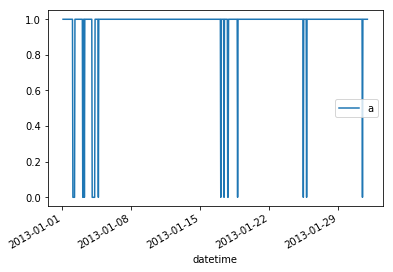

In [35]:
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')].plot(x='datetime', y='a')

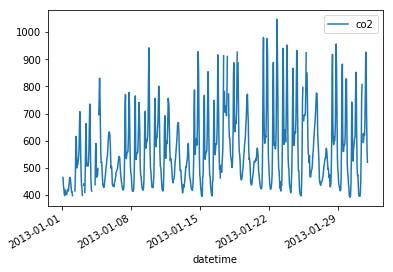

In [117]:
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')].plot(x='datetime', y='co2')

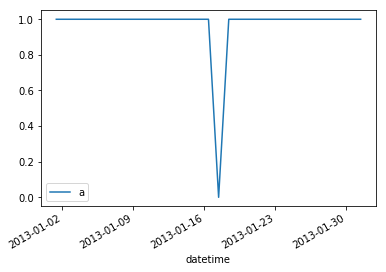

In [63]:
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='a')

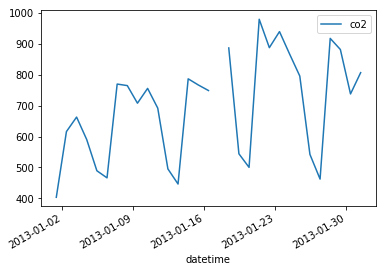

In [118]:
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2')

Création de a_day : nombre de valeurs manquantes sur une journée 

In [87]:
#je prends un index du tableau
i= 32
data_i = data.loc[i] 
data_i_co2 = data_i["co2"]
data_i_day = data.loc[i-12:i+12]
data_i_day_co2 = data_i_day["co2"]
data_i_day_a = data_i_day["a"]
data_i_day_a

20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
Name: a, dtype: int64

In [90]:
#je définis aday comme étant le nombre de valeurs non manquantes dans la fourchette index-12 /index+12 soit une journée
data_i["a_day"] = data_i_day_a.count()
data_i

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


co2                              980
humi                              50
no                               122
no2                               25
pm10                             808
pm2.5                            265
station                        auber
temp                            17.4
date             2013-01-21 00:00:00
time                        10:00:00
precipitation                    2.3
temp_min                          -3
temp_max                           1
ligne                              a
stop_id                           95
year                            2013
month                              1
day                               21
hour                              10
minute                             0
second                             0
datetime         2013-01-21 10:00:00
a                                  1
a_day                             25
Name: 32, dtype: object

### Interpolation

In [137]:
import scipy 
data_inter_pchip = data.interpolate(method='pchip')    

In [139]:
data_inter_pchip.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,ligne,stop_id,year,month,day,hour,minute,second,datetime,a
0,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,3,389,2013,1,1,10,0,0,2013-01-01 10:00:00,1
1,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,9,402,2013,1,1,10,0,0,2013-01-01 10:00:00,1
2,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,a,95,2013,1,1,10,0,0,2013-01-01 10:00:00,1
3,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,3,389,2013,1,15,10,0,0,2013-01-15 10:00:00,1
4,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,9,402,2013,1,15,10,0,0,2013-01-15 10:00:00,1


In [140]:
data_co2= data_inter_pchip[data_inter_pchip["co2"].isnull()]

In [141]:
data_co2.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,ligne,stop_id,year,month,day,hour,minute,second,datetime,a


Visualisation des données interpolées 

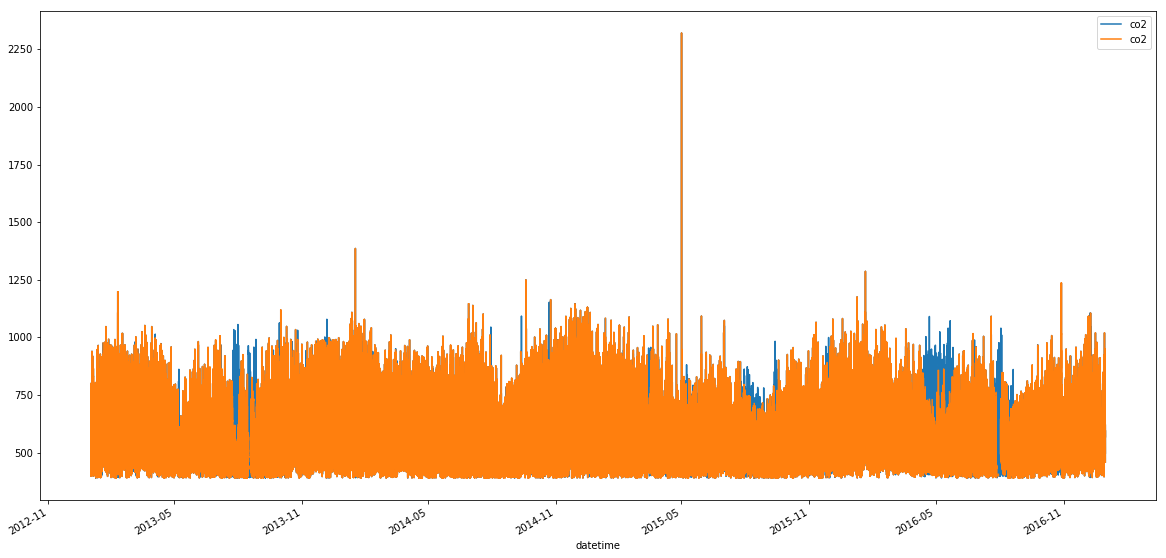

In [143]:
fig, ax = plt.subplots(figsize=(20,10))
data_inter_pchip.plot(x = "datetime",y = "co2", ax=ax)
data.plot(x="datetime",y = "co2", ax=ax)

In [134]:
data_inter_linear = data.interpolate(method='linear')

In [144]:
data_inter_quadratic =data.interpolate(method='quadratic')

In [145]:
data_inter_cubic= data.interpolate(method='cubic')

In [146]:
data_inter_values = data.interpolate(method='values')

In [147]:
#data_inter_cbarycentric= data.interpolate(method='barycentric')

c:\program files\python36\lib\site-packages\scipy\interpolate\polyint.py:511: RuntimeWarning: overflow encountered in multiply
  self.wi[:j] *= (self.xi[j]-self.xi[:j])
c:\program files\python36\lib\site-packages\scipy\interpolate\polyint.py:513: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1


MemoryError: 

In [148]:
data_inter_akima = data.interpolate(method='akima')

In [149]:
data_inter_rien = data.interpolate()

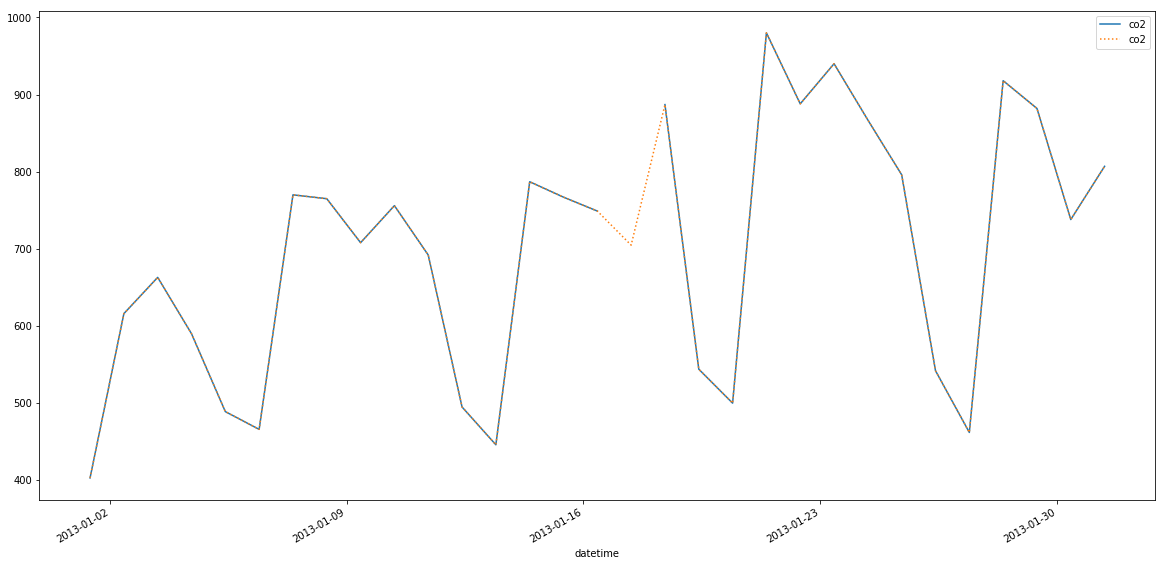

In [151]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2',ax=ax)
data_inter_pchip[(data_inter_pchip['year'] == 2013 )&(data_inter_pchip['month'] == 1)&(data_inter_pchip['stop_id'] == 389)&(data_inter_pchip['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

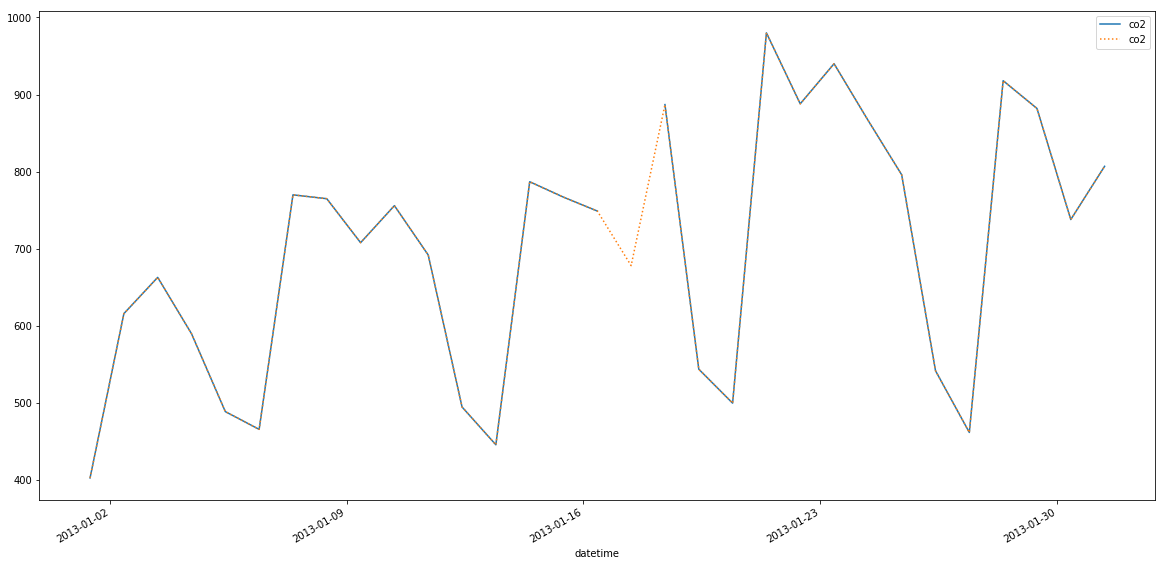

In [152]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2',ax=ax)
data_inter_linear[(data_inter_linear['year'] == 2013 )&(data_inter_linear['month'] == 1)&(data_inter_linear['stop_id'] == 389)&(data_inter_linear['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

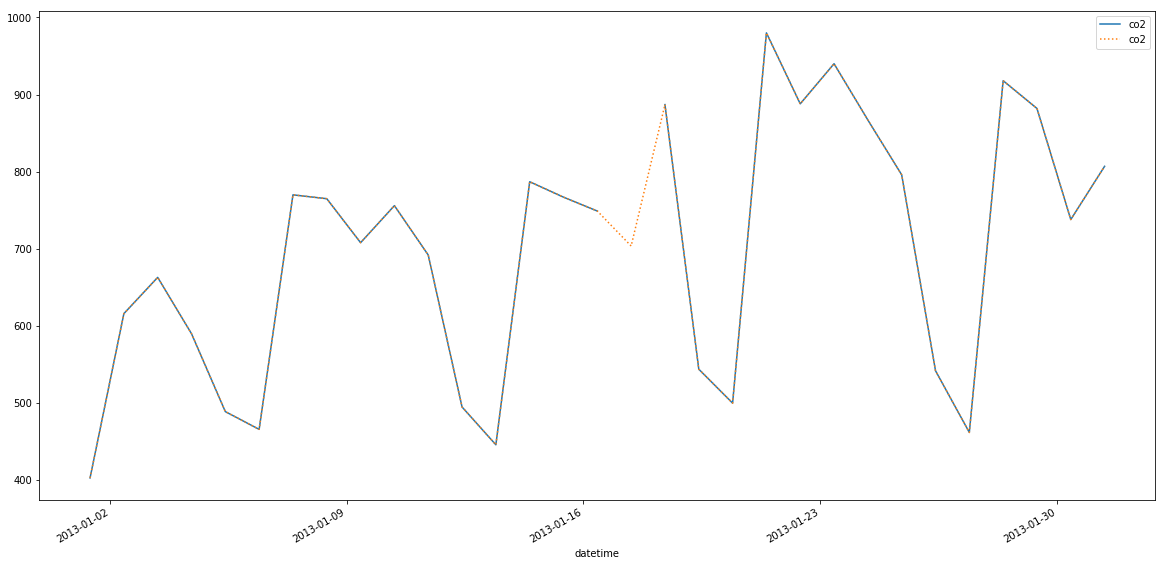

In [153]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2',ax=ax)
data_inter_quadratic[(data_inter_quadratic['year'] == 2013 )&(data_inter_quadratic['month'] == 1)&(data_inter_quadratic['stop_id'] == 389)&(data_inter_quadratic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

si nombre de données manquantes correspond à un certain cas alors appliquer traitement
s'il manque une heure moyenne de tous les lundis ou moyenne par rapport à avant 


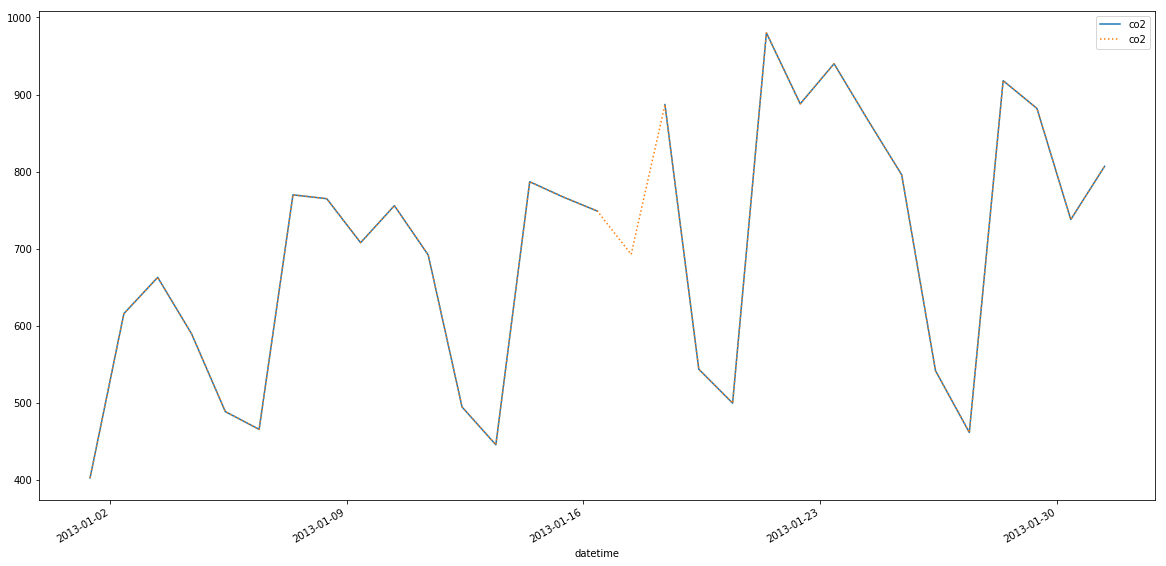

In [154]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2',ax=ax)
data_inter_cubic[(data_inter_cubic['year'] == 2013 )&(data_inter_cubic['month'] == 1)&(data_inter_cubic['stop_id'] == 389)&(data_inter_cubic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

In [155]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2',ax=ax)
data_inter_values(data_inter_values['year'] == 2013 )&(data_inter_values['month'] == 1)&(data_inter_values['stop_id'] == 389)&(data_inter_values['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

SyntaxError: invalid syntax (<ipython-input-155-a5a6f0beaca4>, line 3)

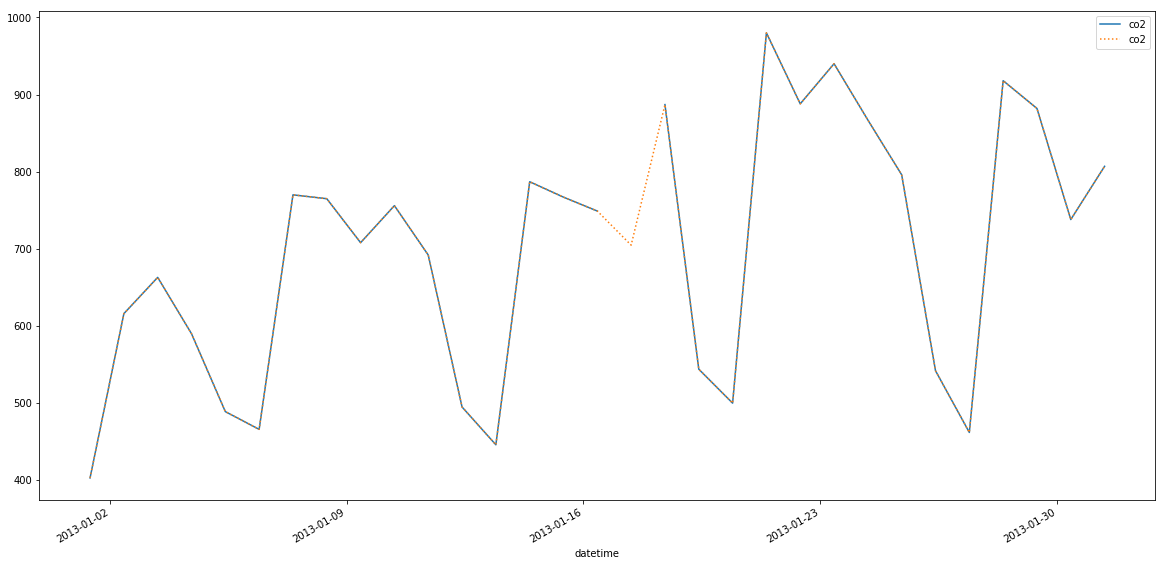

In [156]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2',ax=ax)
data_inter_akima[(data_inter_akima['year'] == 2013 )&(data_inter_akima['month'] == 1)&(data_inter_akima['stop_id'] == 389)&(data_inter_akima['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

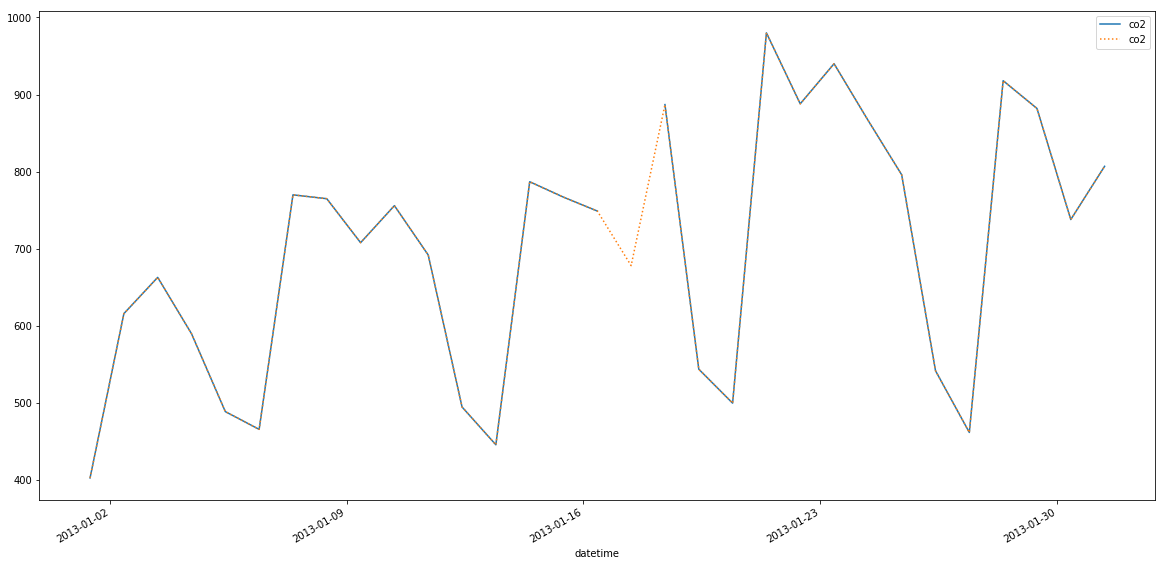

In [157]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2',ax=ax)
data_inter_rien[(data_inter_rien['year'] == 2013 )&(data_inter_rien['month'] == 1)&(data_inter_rien['stop_id'] == 389)&(data_inter_rien['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

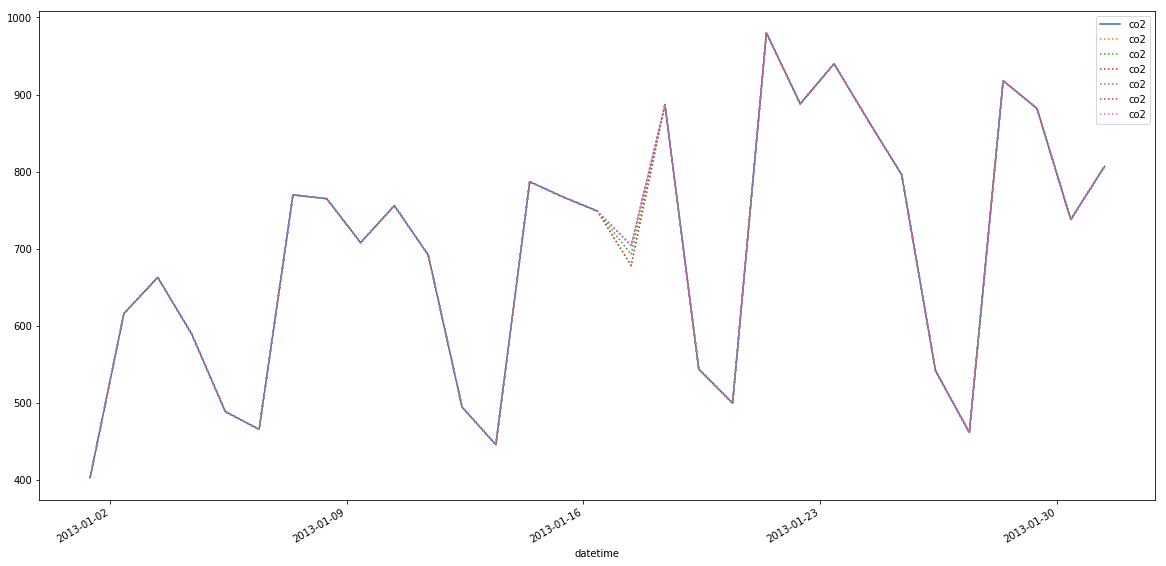

In [160]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2',ax=ax)
data_inter_rien[(data_inter_rien['year'] == 2013 )&(data_inter_rien['month'] == 1)&(data_inter_rien['stop_id'] == 389)&(data_inter_rien['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_cubic[(data_inter_cubic['year'] == 2013 )&(data_inter_cubic['month'] == 1)&(data_inter_cubic['stop_id'] == 389)&(data_inter_cubic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_akima[(data_inter_akima['year'] == 2013 )&(data_inter_akima['month'] == 1)&(data_inter_akima['stop_id'] == 389)&(data_inter_akima['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_quadratic[(data_inter_quadratic['year'] == 2013 )&(data_inter_quadratic['month'] == 1)&(data_inter_quadratic['stop_id'] == 389)&(data_inter_quadratic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_linear[(data_inter_linear['year'] == 2013 )&(data_inter_linear['month'] == 1)&(data_inter_linear['stop_id'] == 389)&(data_inter_linear['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_pchip[(data_inter_pchip['year'] == 2013 )&(data_inter_pchip['month'] == 1)&(data_inter_pchip['stop_id'] == 389)&(data_inter_pchip['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

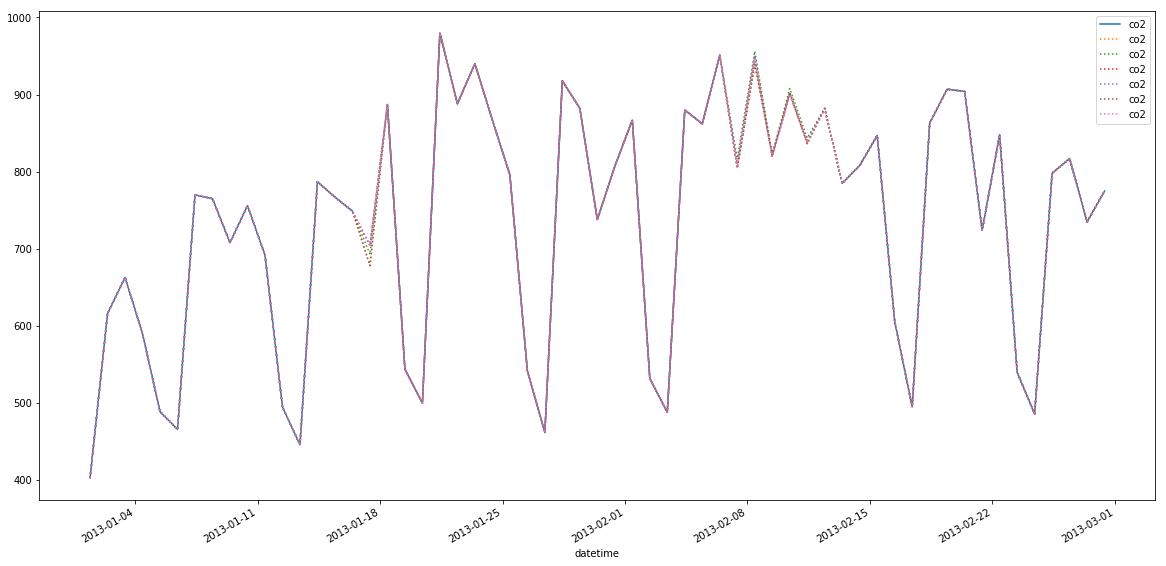

In [161]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] < 3)&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2',ax=ax)
data_inter_rien[(data_inter_rien['year'] == 2013 )&(data_inter_rien['month'] < 3)&(data_inter_rien['stop_id'] == 389)&(data_inter_rien['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_cubic[(data_inter_cubic['year'] == 2013 )&(data_inter_cubic['month'] < 3)&(data_inter_cubic['stop_id'] == 389)&(data_inter_cubic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_akima[(data_inter_akima['year'] == 2013 )&(data_inter_akima['month'] < 3)&(data_inter_akima['stop_id'] == 389)&(data_inter_akima['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_quadratic[(data_inter_quadratic['year'] == 2013 )&(data_inter_quadratic['month'] < 3)&(data_inter_quadratic['stop_id'] == 389)&(data_inter_quadratic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_linear[(data_inter_linear['year'] == 2013 )&(data_inter_linear['month'] < 3)&(data_inter_linear['stop_id'] == 389)&(data_inter_linear['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_pchip[(data_inter_pchip['year'] == 2013 )&(data_inter_pchip['month'] < 3)&(data_inter_pchip['stop_id'] == 389)&(data_inter_pchip['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

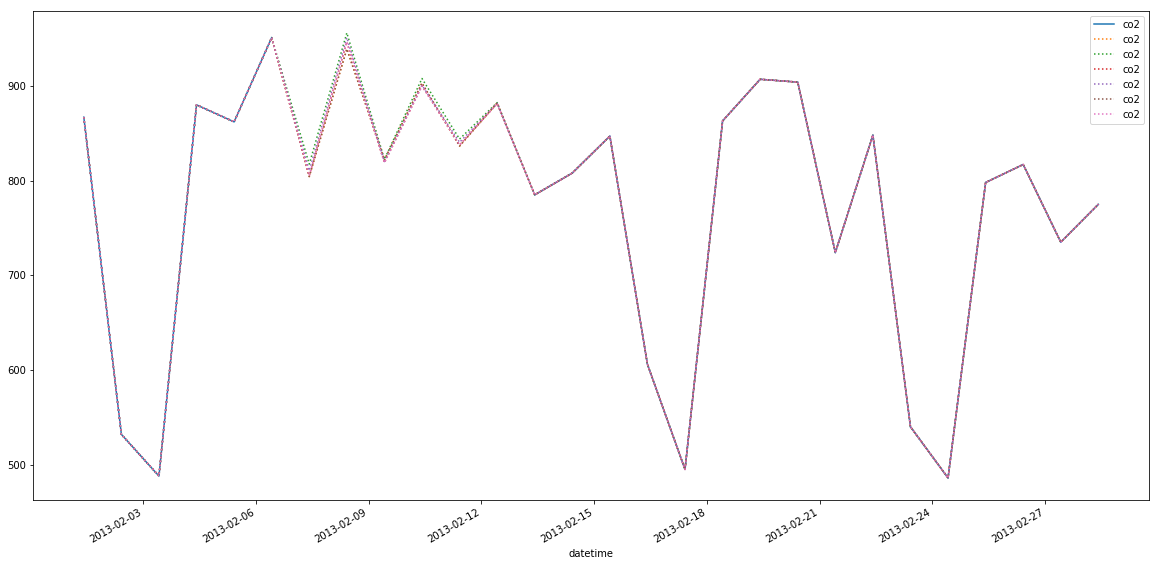

In [162]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] ==2 )&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2',ax=ax)
data_inter_rien[(data_inter_rien['year'] == 2013 )&(data_inter_rien['month'] ==2)&(data_inter_rien['stop_id'] == 389)&(data_inter_rien['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_cubic[(data_inter_cubic['year'] == 2013 )&(data_inter_cubic['month'] ==2)&(data_inter_cubic['stop_id'] == 389)&(data_inter_cubic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_akima[(data_inter_akima['year'] == 2013 )&(data_inter_akima['month'] ==2)&(data_inter_akima['stop_id'] == 389)&(data_inter_akima['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_quadratic[(data_inter_quadratic['year'] == 2013 )&(data_inter_quadratic['month'] ==2)&(data_inter_quadratic['stop_id'] == 389)&(data_inter_quadratic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_linear[(data_inter_linear['year'] == 2013 )&(data_inter_linear['month']==2)&(data_inter_linear['stop_id'] == 389)&(data_inter_linear['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_pchip[(data_inter_pchip['year'] == 2013 )&(data_inter_pchip['month'] ==2)&(data_inter_pchip['stop_id'] == 389)&(data_inter_pchip['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

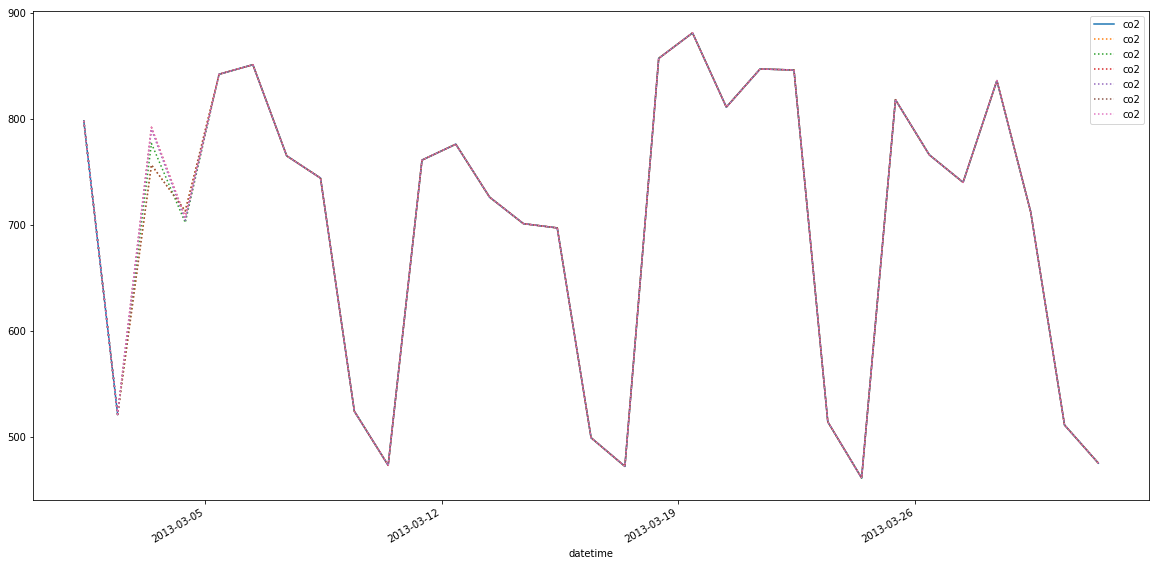

In [163]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] ==3 )&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2',ax=ax)
data_inter_rien[(data_inter_rien['year'] == 2013 )&(data_inter_rien['month'] ==3)&(data_inter_rien['stop_id'] == 389)&(data_inter_rien['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_cubic[(data_inter_cubic['year'] == 2013 )&(data_inter_cubic['month'] ==3)&(data_inter_cubic['stop_id'] == 389)&(data_inter_cubic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_akima[(data_inter_akima['year'] == 2013 )&(data_inter_akima['month'] ==3)&(data_inter_akima['stop_id'] == 389)&(data_inter_akima['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_quadratic[(data_inter_quadratic['year'] == 2013 )&(data_inter_quadratic['month'] ==3)&(data_inter_quadratic['stop_id'] == 389)&(data_inter_quadratic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_linear[(data_inter_linear['year'] == 2013 )&(data_inter_linear['month']==3)&(data_inter_linear['stop_id'] == 389)&(data_inter_linear['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_pchip[(data_inter_pchip['year'] == 2013 )&(data_inter_pchip['month'] ==3)&(data_inter_pchip['stop_id'] == 389)&(data_inter_pchip['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

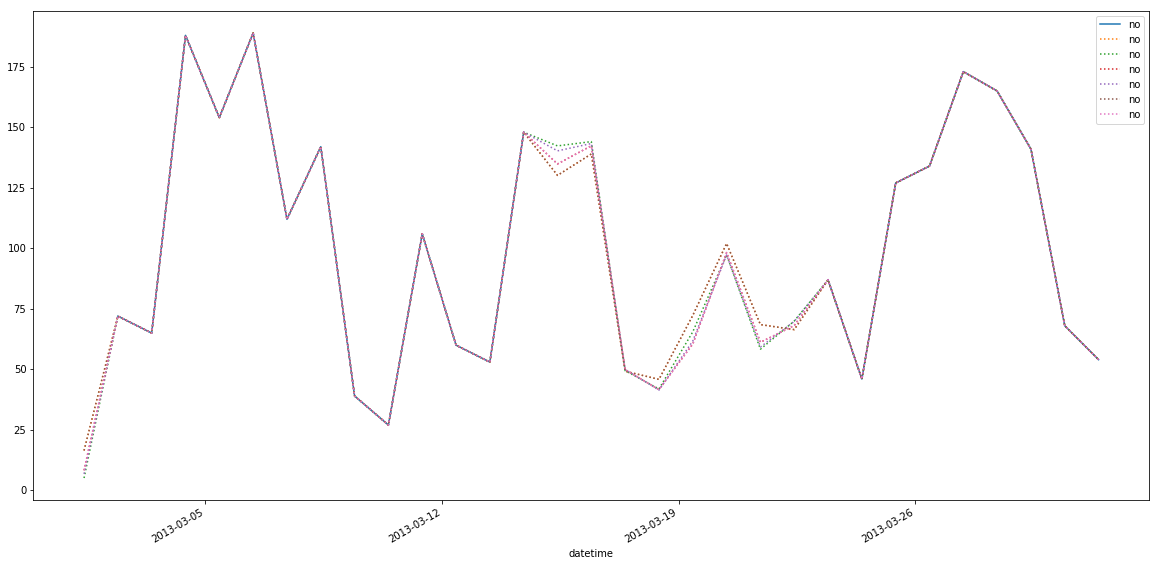

In [175]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] ==3 )&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='no',ax=ax)
data_inter_rien[(data_inter_rien['year'] == 2013 )&(data_inter_rien['month'] ==3)&(data_inter_rien['stop_id'] == 389)&(data_inter_rien['station'] == 'auber')].plot(x='datetime', y='no',ax=ax, linestyle=':')
data_inter_cubic[(data_inter_cubic['year'] == 2013 )&(data_inter_cubic['month'] ==3)&(data_inter_cubic['stop_id'] == 389)&(data_inter_cubic['station'] == 'auber')].plot(x='datetime', y='no',ax=ax, linestyle=':')
data_inter_akima[(data_inter_akima['year'] == 2013 )&(data_inter_akima['month'] ==3)&(data_inter_akima['stop_id'] == 389)&(data_inter_akima['station'] == 'auber')].plot(x='datetime', y='no',ax=ax, linestyle=':')
data_inter_quadratic[(data_inter_quadratic['year'] == 2013 )&(data_inter_quadratic['month'] ==3)&(data_inter_quadratic['stop_id'] == 389)&(data_inter_quadratic['station'] == 'auber')].plot(x='datetime', y='no',ax=ax, linestyle=':')
data_inter_linear[(data_inter_linear['year'] == 2013 )&(data_inter_linear['month']==3)&(data_inter_linear['stop_id'] == 389)&(data_inter_linear['station'] == 'auber')].plot(x='datetime', y='no',ax=ax, linestyle=':')
data_inter_pchip[(data_inter_pchip['year'] == 2013 )&(data_inter_pchip['month'] ==3)&(data_inter_pchip['stop_id'] == 389)&(data_inter_pchip['station'] == 'auber')].plot(x='datetime', y='no',ax=ax, linestyle=':')

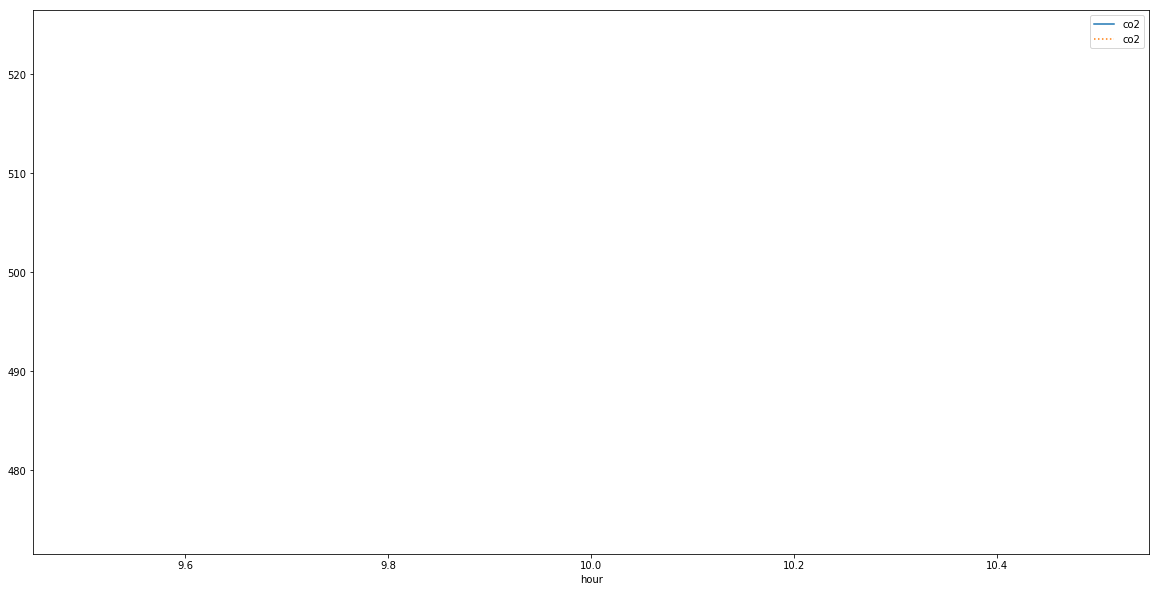

In [182]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] ==3 )&(data['day'] ==16 )&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='hour', y='co2',ax=ax)
data_inter_rien[(data_inter_rien['year'] == 2013 )&(data['month'] ==3 )&(data['day'] ==16)&(data_inter_rien['month'] ==3)&(data_inter_rien['stop_id'] == 389)&(data_inter_rien['station'] == 'auber')].plot(x='hour', y='co2',ax=ax, linestyle=':')

In [183]:
print(len(data_inter_pchip[data_inter_pchip["co2"].isnull() & 
                        data_inter_pchip["humi"].isnull() &
                        data_inter_pchip["no"].isnull() & 
                        data_inter_pchip["no2"].isnull() &
                        data_inter_pchip["pm10"].isnull() & 
                        data_inter_pchip["pm2.5"].isnull() & 
                        data_inter_pchip["no2"].isnull() & 
                       data_inter_pchip["temp"].isnull()]))

0


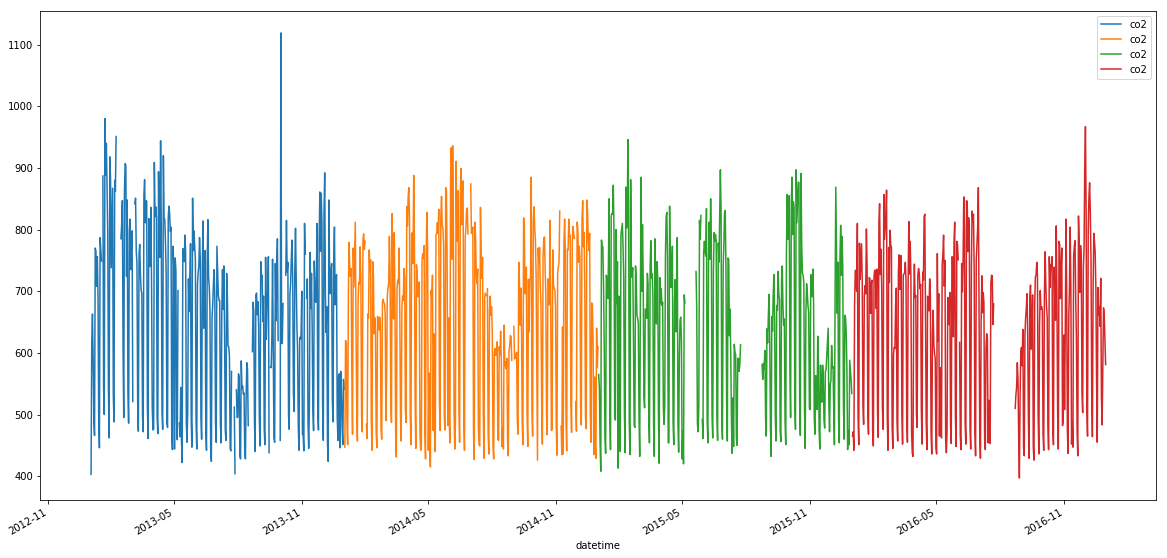

In [177]:
#snsfactorplot
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2',ax=ax)
data[(data['year'] == 2014 )&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2',ax=ax)
data[(data['year'] == 2015 )&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2',ax=ax)
data[(data['year'] == 2016 )&(data['station'] == 'auber')&(data['stop_id'] == 389)].plot(x='datetime', y='co2',ax=ax)

In [181]:
data_inter_pchip.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,ligne,stop_id,year,month,day,hour,minute,second,datetime,a
0,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,3,389,2013,1,1,10,0,0,2013-01-01 10:00:00,1
1,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,9,402,2013,1,1,10,0,0,2013-01-01 10:00:00,1
2,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,a,95,2013,1,1,10,0,0,2013-01-01 10:00:00,1
3,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,3,389,2013,1,15,10,0,0,2013-01-15 10:00:00,1
4,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,9,402,2013,1,15,10,0,0,2013-01-15 10:00:00,1


In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
data[(data['year'] == 2013 )&(data['month'] == 1)&(data['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax)
data_inter_rien[(data_inter_rien['year'] == 2013 )&(data_inter_rien['month'] == 1)&(data_inter_rien['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_cubic[(data_inter_cubic['year'] == 2013 )&(data_inter_cubic['month'] == 1)&(data_inter_cubic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_akima[(data_inter_akima['year'] == 2013 )&(data_inter_akima['month'] == 1)&(data_inter_akima['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_quadratic[(data_inter_quadratic['year'] == 2013 )&(data_inter_quadratic['month'] == 1)&(data_inter_quadratic['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_linear[(data_inter_linear['year'] == 2013 )&(data_inter_linear['month'] == 1)&(data_inter_linear['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')
data_inter_pchip[(data_inter_pchip['year'] == 2013 )&(data_inter_pchip['month'] == 1)&(data_inter_pchip['station'] == 'auber')].plot(x='datetime', y='co2',ax=ax, linestyle=':')

In [37]:
missing = data[(data['year'] == 2013 )&(data['month'] == 1)&(data['day'] == 3)&(data['hour'] == 2)&(data['station'] == 'auber')]
print(missing)

       co2  humi  no  no2   pm10  pm2.5 station  temp       date      time  \
86158  NaN  50.5 NaN  NaN  247.0   88.0   auber  19.7 2013-01-03  02:00:00   
86159  NaN  50.5 NaN  NaN  247.0   88.0   auber  19.7 2013-01-03  02:00:00   

      ...  ligne  stop_id  year month  day  hour  minute  second  \
86158 ...      3        8  2013     1    3     2       0       0   
86159 ...      9       18  2013     1    3     2       0       0   

                 datetime  a  
86158 2013-01-03 02:00:00  0  
86159 2013-01-03 02:00:00  0  

[2 rows x 23 columns]


In [22]:
type(missing_data_2016_auber_modified)
missing_data_2016_auber_modified.empty
missing_data_2016_auber_modified.dtypes
missing_data_2016_auber_modified[['co2','humi', 'no', 'no2', 'pm10','pm2.5','temp','temp_min','temp_max']] = missing_data_2016_auber_modified[['co2','humi', 'no', 'no2', 'pm10','pm2.5','temp','temp_min','temp_max']].apply(pd.to_numeric)
missing_data_2016_auber_modified.dtypes

NameError: name 'missing_data_2016_auber_modified' is not defined

PROBLEME D'AFFICHAGE DU GRAPHIQUE POUR CERTAINES COLONNES EN ORDONNEE DONT LA QUALITE DE L'AIR : POURQUOI ???

In [23]:
missing_data_2016_auber_modified_co2 = missing_data_2016_auber_modified[missing_data_2016_auber_modified["co2"] == 1]

NameError: name 'missing_data_2016_auber_modified' is not defined

NameError: name 'missing_data_2016_auber_modified_co2' is not defined

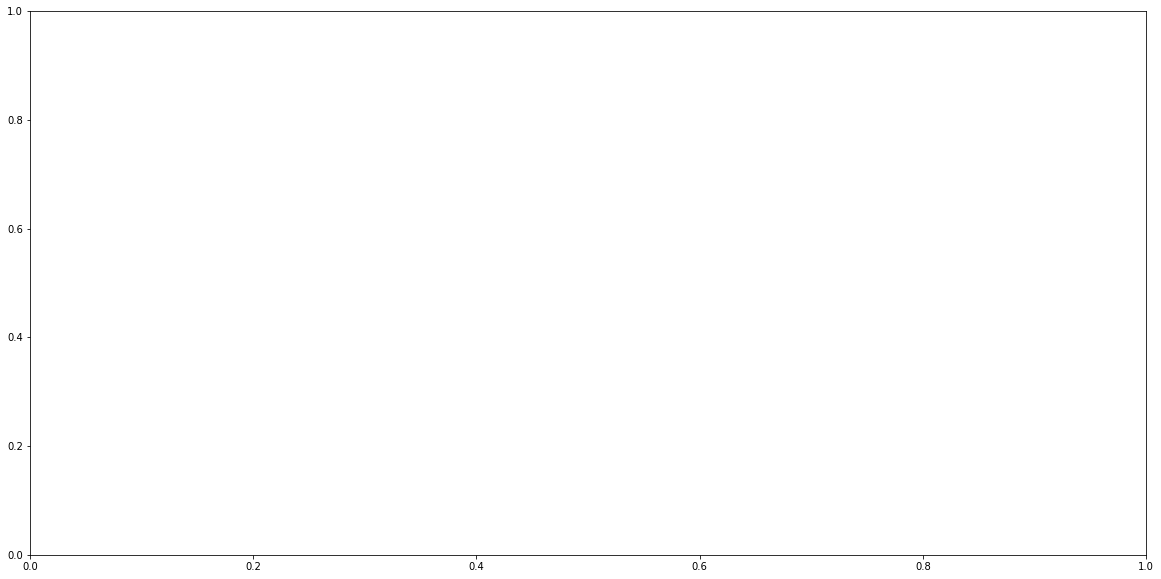

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
missing_data_2016_auber_modified_co2.plot(x = "datetime",y = "co2", ax=ax)

In [ ]:
missing_data_co2 = data[data["co2"].isnull()]
missing_data_humi = data[data["humi"].isnull()]
missing_data_no = data[data["no"].isnull()]
missing_data_no2 = data[data["no2"].isnull()]
missing_data_pm10 = data[data["pm10"].isnull()]
missing_data_pm2_5 = data[data["pm2.5"].isnull()]
missing_data_no2 = data[data["no2"].isnull()]
missing_data_temp = data[data["temp"].isnull()]

missing_data_co2.head()

In [ ]:
#fig, ax = plt.subplots(figsize=(20,10))
#sns.distplot(missing_data_co2[missing_data_co2['station'] == 'auber']['month'],missing_data_no[missing_data_no['station'] == 'auber']['month'],ax = ax, kde = False)
#missing_data_co2.plot(x = 'date',y = 'co2', ax = ax)
#missing_data_co2.plot(x='date', y= 'station', ax = ax)
#missing_data_no.plot(x='date', y= 'station', ax = ax)
#plt.show()
#Z= append.([np.ones_like(missing_data_co2)], Z.missing_data_co2,0).missing_data_co2

L = len(missing_data_co2)
print(L)
L = int(L)
M = np.ones(L)
#missing_data_co2.append(M)
type(missing_data_co2)


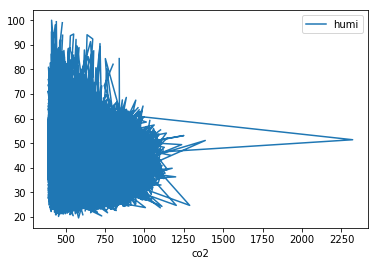

In [25]:
data.plot(x = 'co2',y = 'humi')


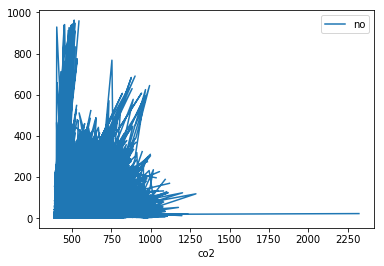

In [26]:
data.plot(x = 'co2',y = 'no')

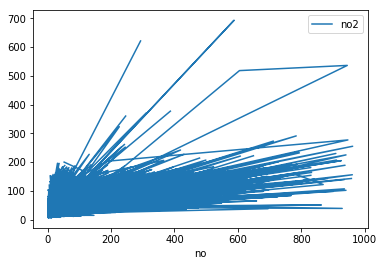

In [27]:
data.plot(x = 'no',y = 'no2')

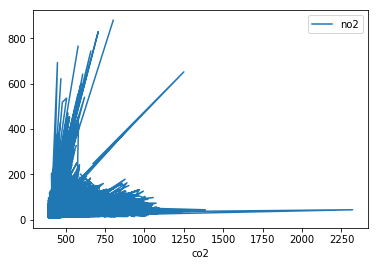

In [28]:
data.plot(x = 'co2',y = 'no2')

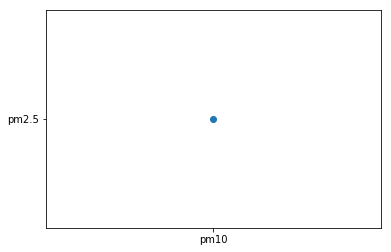

In [29]:
plt.scatter(x = 'pm10',y = 'pm2.5')
plt.show()

In [30]:
def valeur(x):
    return [len(data[data[x].isnull() & 
                        data["co2"].isnull()]),len(data[data[x].isnull() & 
                        data["humi"].isnull()]), len(data[data[x].isnull() & 
                        data["no"].isnull()]),len(data[data[x].isnull() & 
                        data["no2"].isnull()]),len(data[data[x].isnull() & 
                        data["pm10"].isnull()]),len(data[data[x].isnull() & 
                        data["pm2.5"].isnull()]),len(data[data[x].isnull() & 
                        data["temp"].isnull()])]
                

d =  {'col1' : valeur('co2'),'col2': valeur('humi'),'col3' : valeur('no'), 
      'col4': valeur ('no2'), 'col5' : valeur('pm10'), 'col6': valeur('pm2.5'), 'col7' : valeur('temp')}


df1= pd.DataFrame(data=d, index = ['missing data co2','missing data humi', 'missing data no', 
             'missing data no2', 'missing data pm10', 'missing data pm2.5', 'missing data temp'])
df1.columns=['missing data co2', 'missing data humi', 'missing data no', 
             'missing data no2', 'missing data pm10', 'missing data pm2.5', 'missing data temp']


df1
                                                   

,missing data co2,missing data humi,missing data no,missing data no2,missing data pm10,missing data pm2.5,missing data temp
missing data co2,34095,15977,21284,19053,17743,30287,16084
missing data humi,15977,17018,15955,15924,15906,17008,16985
missing data no,21284,15955,98614,46621,19597,89744,16068
missing data no2,19053,15924,46621,46623,17246,38726,16037
missing data pm10,17743,15906,19597,17246,32425,31151,15941
missing data pm2.5,30287,17008,89744,38726,31151,304035,17096
missing data temp,16084,16985,16068,16037,15941,17096,17114


Nombre de données manquantes 
en binome:
min missing data pm10 et humi 15 906
max missing data pm2.5 et no 89744
en absolu : 
min humi 
max pm2.5


In [31]:
df1.min

<bound method DataFrame.min of                     missing data co2  missing data humi  missing data no  \
missing data co2               34095              15977            21284   
missing data humi              15977              17018            15955   
missing data no                21284              15955            98614   
missing data no2               19053              15924            46621   
missing data pm10              17743              15906            19597   
missing data pm2.5             30287              17008            89744   
missing data temp              16084              16985            16068   

                    missing data no2  missing data pm10  missing data pm2.5  \
missing data co2               19053              17743               30287   
missing data humi              15924              15906               17008   
missing data no                46621              19597               89744   
missing data no2               46623        